In [32]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer

In [3]:
def fetch_dataset_tgz(url,file_name,local_path):
    if not os.path.isdir(local_path):
        os.makedirs(local_path)
    urllib.request.urlretrieve(url,os.path.join(local_path,file_name))
    file_tgz=os.path.join(local_path,file_name)
    gzfile=tarfile.open(file_tgz)
    gzfile.extractall(path=local_path)
    print("removing gz file")
    os.remove(file_tgz)
    gzfile.close()
def load_dataset(file_path):
    df=pd.read_csv(file_path)
    return df

In [22]:
fetch_dataset_tgz("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz","housing.tgz","dataset")

removing gz file


In [4]:
df=load_dataset("dataset/housing.csv")
print(df.info())
print(df.head())
print(df['ocean_proximity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


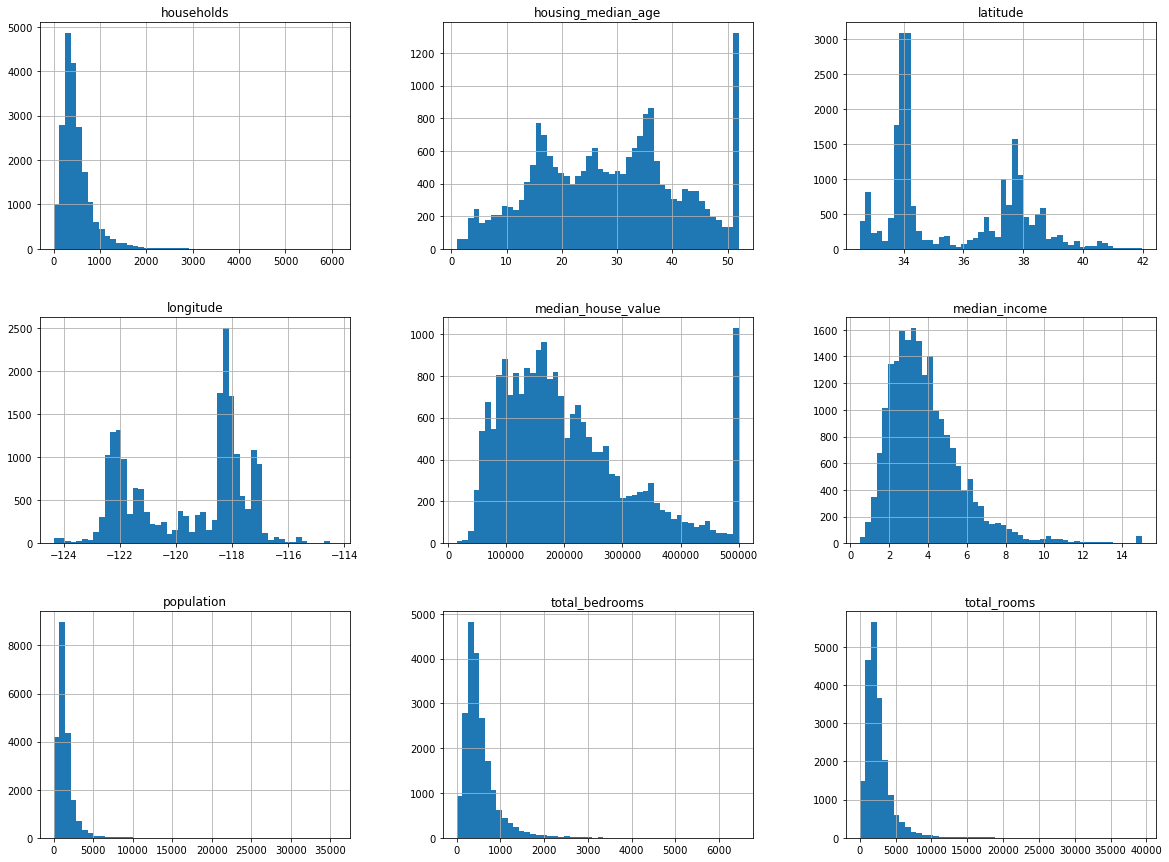

In [6]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
def split_train_test(data,test_ratio=0.2):
    indices=np.random.permutation(len(data))
    testLength=int(len(data)*test_ratio)
    test_indices=indices[:testLength]
    train_indices=indices[testLength:]
    return data.iloc[train_indices],data.iloc[test_indices]
print(len(df)*0.2)
train,test=split_train_test(df)
print(len(train),len(test))

4128.0
16512 4128


In [8]:
train,test=train_test_split(df,test_size=0.2,random_state=21)
print(len(train),len(test))

16512 4128


In [9]:
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat']> 5.0, 5.0,inplace=True)

In [10]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=21)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]
print(len(strat_train_set),len(strat_test_set))

16512 4128


In [11]:
for s in (strat_train_set,strat_test_set):
    s.drop("income_cat",axis=1,inplace=True)

In [12]:
housing=strat_train_set.copy()

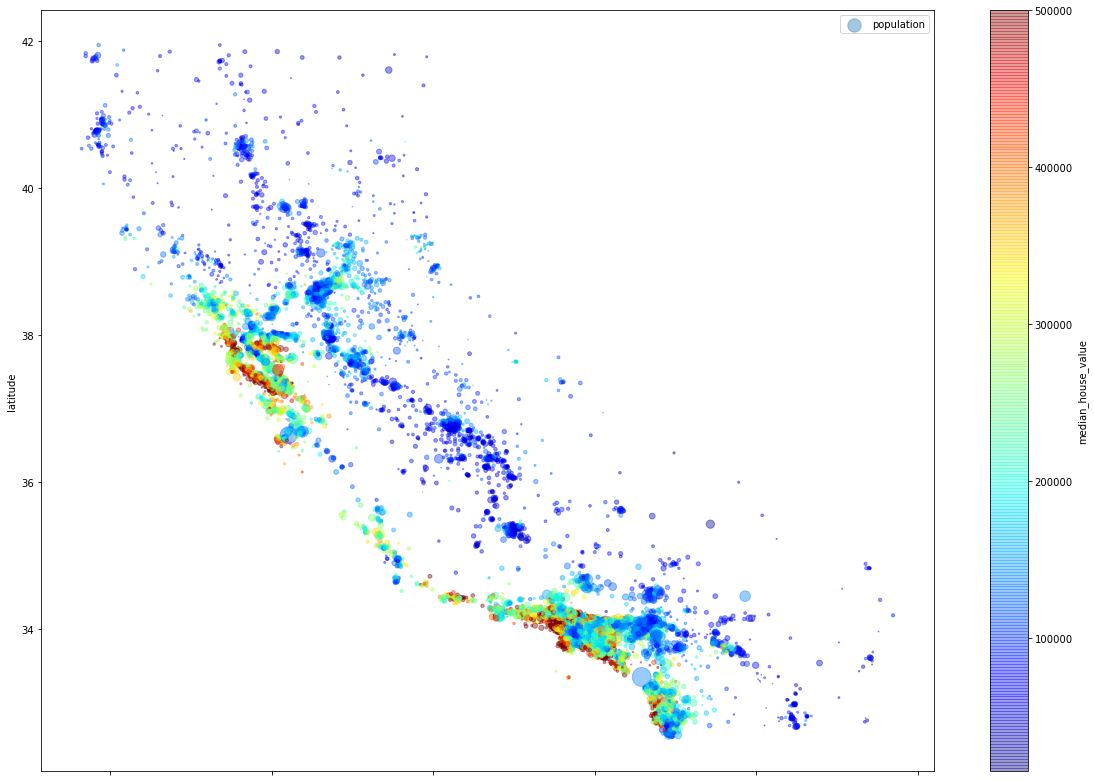

In [74]:
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label="population",figsize=(20,14),c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [13]:
corr_matrix=housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.690340
total_rooms           0.133317
housing_median_age    0.103429
households            0.064414
total_bedrooms        0.047750
population           -0.025111
longitude            -0.049034
latitude             -0.142174
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b639a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116f01b70>]], dtype=object)

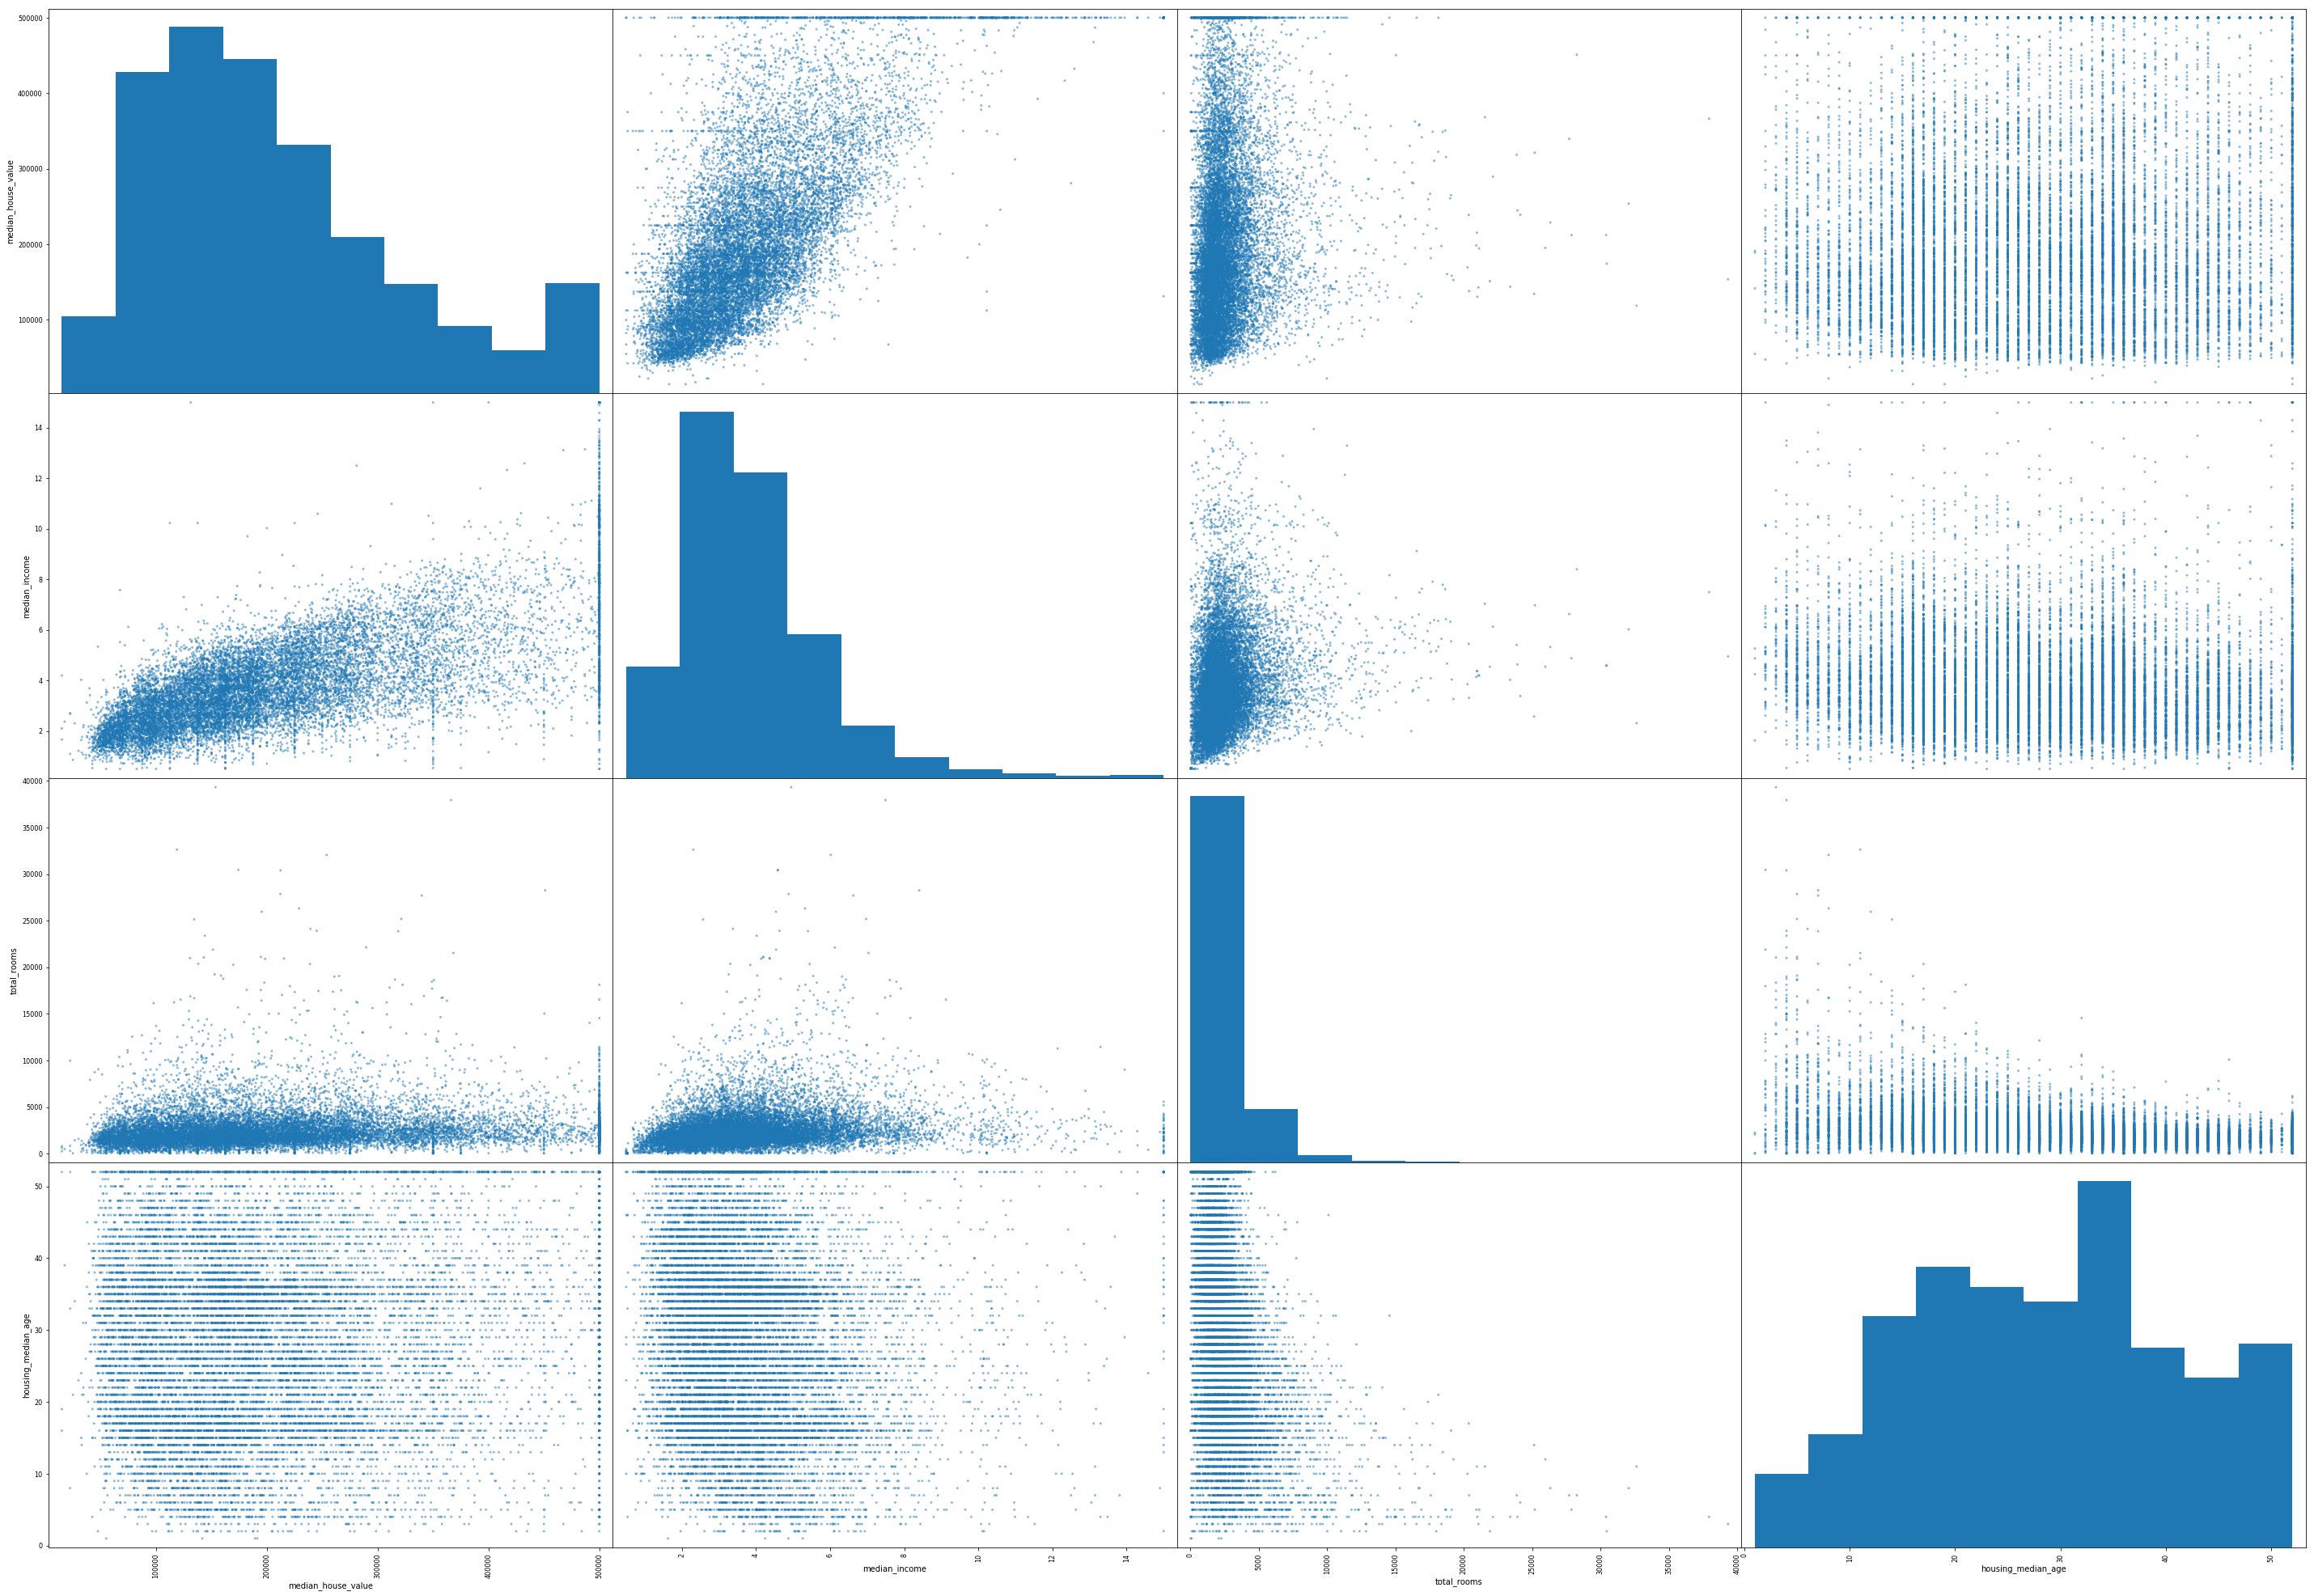

In [14]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(50,35))

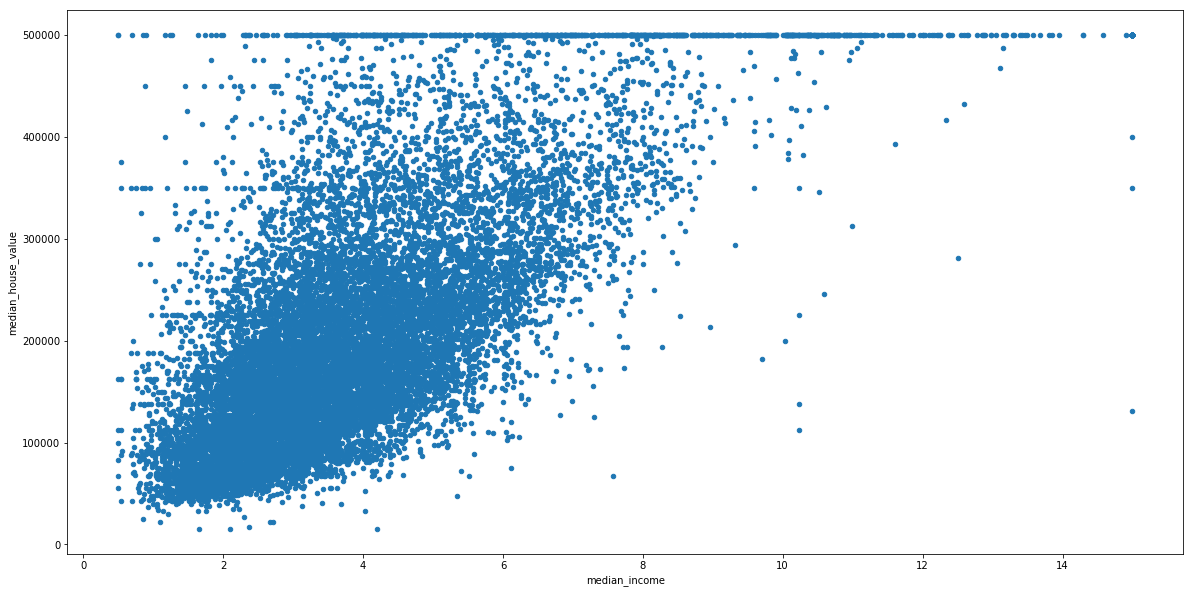

In [82]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',figsize=(20,10))

In [15]:
housing_x=housing.drop('median_house_value',axis=1)
housing_labels=housing[['median_house_value']].copy()
print(housing_x.head(),housing_labels.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16419    -121.31     37.90                38.0        226.0            44.0   
5659     -118.30     33.73                47.0       2852.0           603.0   
7046     -118.04     33.95                36.0       1976.0           368.0   
17844    -121.85     37.44                 8.0        426.0            61.0   
12617    -121.55     38.50                 9.0       4868.0           738.0   

       population  households  median_income ocean_proximity  
16419       125.0        38.0         2.9000          INLAND  
5659       1130.0       560.0         4.1940      NEAR OCEAN  
7046       1236.0       355.0         4.6150       <1H OCEAN  
17844       241.0        55.0         7.3090       <1H OCEAN  
12617      2036.0       750.0         5.7621          INLAND          median_house_value
16419            125000.0
5659             293900.0
7046             174000.0
17844            367900.0
12617            

# Preparing Data

In [49]:
# data cleaning using Imputer. 
housing.info() # to check if there are missing values. total_bedrooms have null values. 

# use imputer to find medain for every numerical column. 
imputer=Imputer(strategy="median")
housing_num=housing_x.drop(['ocean_proximity'],axis=1).copy()
imputer.fit(housing_num)
housing_num=pd.DataFrame(imputer.transform(housing_num),columns=housing_num.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16419 to 10502
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16340 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 2.0+ MB
[ -118.5        34.26       29.       2122.        434.       1167.        409.
     3.53505]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


In [53]:
#onehot encoding

encoder=OneHotEncoder()
housing_oc_factorized,housing_oc_cats=housing_x['ocean_proximity'].factorize()
housing_proximx=encoder.fit_transform(housing_oc_factorized.reshape(-1,1))
print(housing_proximx.toarray())

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]]


In [77]:
#tranformations
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class CombinedFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        print(type(X),type(rooms_per_household))
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return [X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return [X,rooms_per_household,population_per_household]
attr_adder=CombinedFeatureAdder(add_bedrooms_per_room=False)
housing_with_features=attr_adder.transform(imputer.transform(housing_num))
housing_with_ft=pd.DataFrame(housing_with_features)
print(housing_with_features[1])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[ 5.94736842  5.09285714  5.56619718 ...,  5.78823529  5.7         4.58091286]


In [82]:
#pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __self__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

class CatEncoder(BaseEstimator, TransformerMixin):
    def __self__(self):
        self.encoder=OneHotEncoder()
    def fit(self ):
        return self
    def transform(self,X):
        catsFactorized,cats=X.factorize()
        encoded_cols=self.encoder.fit_transform(catsFactorized.reshape(-1,1))
        return encoded_cols.toarray()

num_attribs=list(housing_num)
cat_attrib=['ocean_proximity']
num_pipeline=Pipeline([
    ('dataframe_selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy="median")),
    ('attrib_adder',CombinedFeatureAdder()),
    ('factorize',StandardScaler())
])
cat_pipeline=Pipeline([
    ('dataframe_selector',DataFrameSelector(cat_attrib))
    ('encoder',CatEncoder())
])
num_pipeline.fit_transform()

TypeError: object() takes no parameters